# PYTHON - PREVISÃO DE VENDAS


In [1]:
# 1 - Abrir/Importar a tabela desejada 
import pandas as pd
tabela = pd.read_csv("Propagandas.csv")
display(tabela)

# -- NoTrAtDaT

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


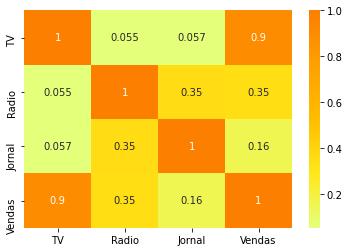

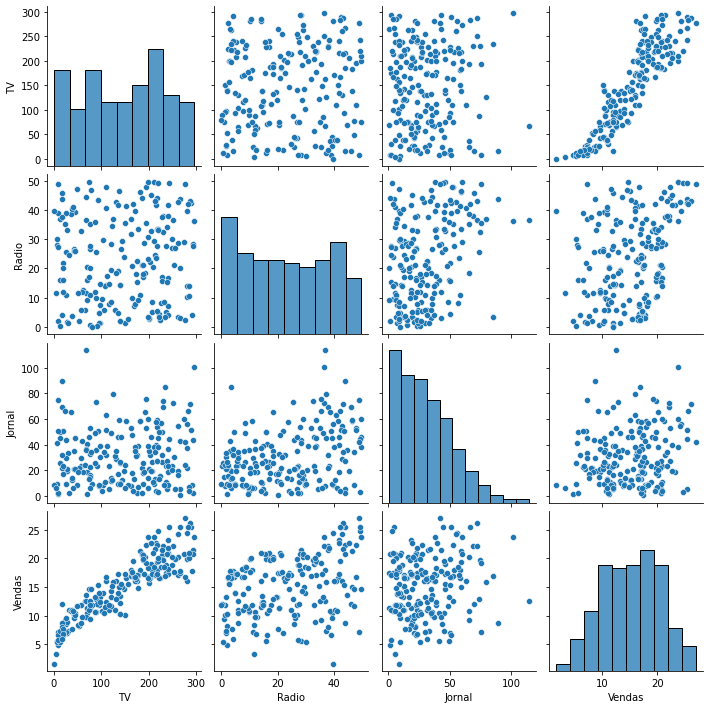

In [5]:
# 2 - Importando graficos para analisar informações e correlações entre cada item da tabela > Analise Exploratória
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)     # Craindo um mapa de calor  e mostrando as correlações da tabela
plt.show()                                                #Mostrar o gráfico

sns.pairplot(tabela)
plt.show()

In [8]:
# 3 - Criar o modelo do Marchine Learning para separar os dados de Train e dos dados de Test
# Separar dados de X e Y / Sendo Y >  Quem eu quero descobrir = "Vendas". Já p X sendo o restante da tabela
from sklearn.model_selection import train_test_split

# Dados de Y
y = tabela["Vendas"]
# Dados de X
x = tabela.drop("Vendas", axis=1)

# Aplicar o Train e o Test
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
# 4 - Implementado o modelo de regressões - Treinando a IA
from sklearn.linear_model import LinearRegression  # Descobrir a melhor reta
from sklearn.ensemble import RandomForestRegressor # Perguntar para a base de dados S/N

modelo_regressaoLinear = LinearRegression()
modelo_randomForest = RandomForestRegressor()

modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_randomForest.fit(x_treino, y_treino)

RandomForestRegressor()

In [10]:
# Implementado modelo de métrica de estatística > R²= % - Olhando % de acerto da previsão 
# Testando/comparando IAs
previsao_linear = modelo_regressaoLinear.predict(x_teste)
previsao_random = modelo_randomForest.predict(x_teste)

# R² > 0.0 = Ruim e 0.99 = Bom
from sklearn import metrics
print(metrics.r2_score(y_teste, previsao_linear))
print(metrics.r2_score(y_teste, previsao_random))         # Modelo RandomForest melhor, dando previsões mais exatas e acertivas

0.8747226291661846
0.9527831208347808


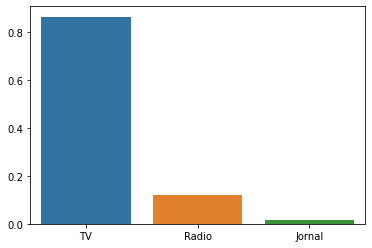

In [11]:
# Analisar os produtos que mais precisam de investimento
sns.barplot(x=x_treino.columns, y=modelo_randomForest.feature_importances_) # Mostrar a coluna mais importante para fazer a previsao
plt.show()